In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/fastcampus/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    if W_ is not None:
        x1 = np.linspace(-.1, 1.1)
        x2 = -W_[1] / W_[2] * x1  - W_[0] / W_[2]
        plt.plot(x1, x2, '--k')

    plt.grid()
    plt.show()

## Data 생성하기

In [3]:
np.random.seed(402)
xy = np.random.rand(30,2)
labels = np.zeros((len(xy),1))
labels[-4./5. +  3./4. * xy[:,0] + 1.0 * xy[:,1] > 0, 0] = 1

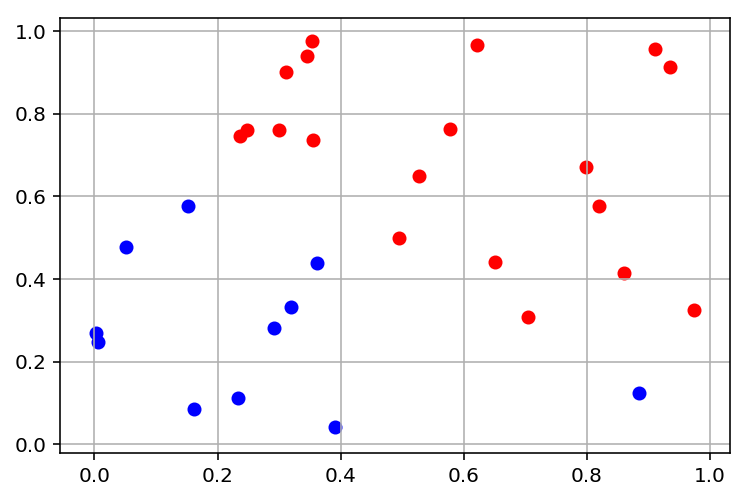

In [4]:
plot_scatter(None, xy, labels)

## Binary Classification
$$
\min_{W,b} \frac{1}{m}\sum_{i=1}^m -y_i \log(\hat{y_i})-(1-y_i) \log(1-\hat{y_i})
$$
where $\hat{y_i} = \sigma(x_i W + b)$

1. Forward Model : $\hat{y_i} = \sigma(x_i W + b)$
1. Cross-Entropy : $\frac{1}{m}\sum_{i=1}^m -y_i \log(\hat{y_i})-(1-y_i) \log(1-\hat{y_i})$


### 01. Model에 맞는 feature 정리
For $i=1,2,\cdots,m$,
$$
\texttt{features}_i = [x_i, y_i]
$$

In [5]:
# TODO1
features = np.array([[xval, yval] for xval, yval in xy])
features[:10]

array([[0.05085764, 0.47670086],
       [0.31164216, 0.9016348 ],
       [0.49502649, 0.49823478],
       [0.91184471, 0.95672465],
       [0.34506596, 0.94023755],
       [0.2366796 , 0.74481348],
       [0.30043802, 0.7606868 ],
       [0.93589014, 0.91266408],
       [0.82007137, 0.57655843],
       [0.79928761, 0.67089507]])

### 02. Model TensorFlow로 정의하기

- TODO2 : `features`를 `feed`할 placeholder(`x`)를 정의
- TODO3 : Weight(`W`)와 bias(`b`)를 `Variable`로 초기값 1로 정의
- TODO4 : Model(`model`) 정의

$$
\hat{y_i} = \sigma(x_i W + b)
$$

In [6]:
# TODO2
x = tf.placeholder(tf.float32, shape=(None, 2))

# TODO3
W = tf.Variable(tf.ones([2, 1]), dtype=tf.float32)
b = tf.Variable(tf.ones([1]), dtype=tf.float32)

# TODO4
model = tf.nn.sigmoid(tf.matmul(x, W) + b)

아래 코드를 돌려 에러가 나지 않으면 정답입니다.

In [7]:
# DO NOT MODIFY CODE BELOW
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
model_val = sess.run(model, feed_dict={x:features})
model_val.flatten()
np.testing.assert_array_almost_equal(model_val.flatten(), np.array([ 0.82164884,  0.90143549,  0.88008773,  0.94627064,  0.9076525 ,
        0.87884021,  0.88706684,  0.94524395,  0.91657001,  0.92202485,
        0.84915382,  0.88213223,  0.89813203,  0.91223586,  0.83902246,
        0.9068526 ,  0.78098732,  0.77686596,  0.8815819 ,  0.88183749,
        0.79339015,  0.93020332,  0.77778834,  0.80740386,  0.90895367,
        0.85820019,  0.89018804,  0.82814378,  0.89006978,  0.91128868]))
print("Test passed.")

Test passed.


### 03. Cross-Entropy 정의하기

- TODO5 : `labels`를 `feed`할 `placeholder`(`y`) 정의하기
- TODO6 : Corss-Entropy(`loss`) 정의하기

$$
 \frac{1}{m}\sum_{i=1}^m -y_i \log(\hat{y_i})-(1-y_i) \log(1-\hat{y_i})
 $$

In [8]:
# TODO 5
y = tf.placeholder(tf.float32, shape=(None, 1))

# TODO 6
loss = tf.reduce_mean(- y * tf.log(model) - (1 - y) * tf.log(1-model))

아래 코드를 돌려 에러가 나지 않으면 정답입니다.

In [9]:
# DO NOT MODIFY CODE BELOW
loss_val = sess.run(loss, feed_dict={x:features, y:labels})
np.testing.assert_almost_equal(loss_val, 0.69793868)
print("Test passed.")

Test passed.


### 04. Hyper-Parameter 설정(TODO 7)
1. Optimizer : `AdamOptimizer`
1. `lerning rate` : `0.1`
1. `MaxEpoch` : `201`
1. Train Step

In [10]:
# TODO 7
lr = 0.1
MaxEpochs= 201
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

### 05. Gradient Descent

- TODO8 : batch 사용하지 않고 모든 features와 labels을 다 feed 해줍니다.

In [11]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: features, y: labels})
    for epoch in range(MaxEpochs):
        if epoch % 50 == 0 :
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y: labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        # TODO 8
        sess.run(train, feed_dict={x: features, y: labels})
    curr_b, curr_W = sess.run([b, W])
W_gd = curr_W.flatten()
b_gd = curr_b.flatten()

0 [1.] [1. 1.] 0.6979387
50 [-2.469686] [2.9124987 3.869042 ] 0.28501523
100 [-4.532812] [4.552016 6.546532] 0.18717656
150 [-5.969785] [5.6833396 8.436917 ] 0.14779027
200 [-7.1451635] [6.6319823 9.969715 ] 0.12507883


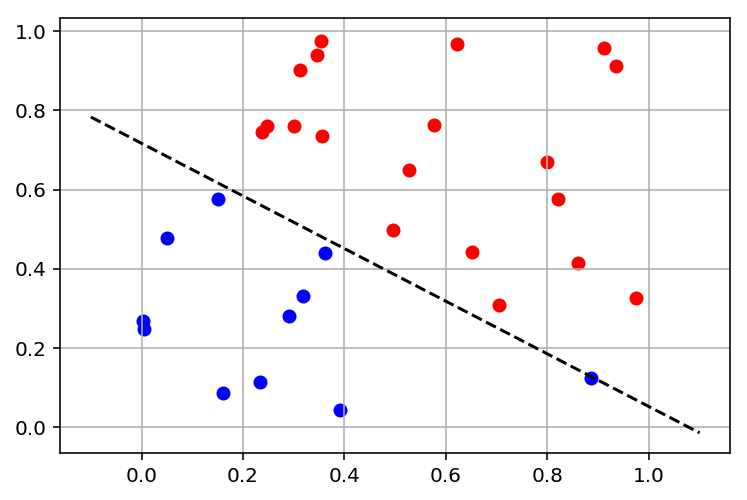

In [12]:
plot_scatter(np.append(b_gd, W_gd), xy, labels)

### 06. Stochastic Gradient Descent(SGD)
- TODO9 : shuffle training set
- TODO10 : batch 생성하기
- TODO11 : batch만 사용하여, train 하기

In [13]:
from helper import generate_batches

In [14]:
# TODO 9
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

In [15]:
batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: shuffled_features, y: shuffled_labels})
    for epoch in range(MaxEpochs):
        if epoch % 50 == 0 :
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: shuffled_features, y: shuffled_labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        # TODO 10
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
            # TODO 11
            sess.run(train, feed_dict={x: x_batch, y: y_batch})

    curr_b, curr_W = sess.run([b, W])
W_sgd = curr_W.flatten()
b_sgd = curr_b.flatten()

0 [1.] [1. 1.] 0.6979387
50 [-6.670298] [5.9745364 9.598608 ] 0.13314709
100 [-9.221184] [ 8.157378 12.858123] 0.09692362
150 [-11.016917] [ 9.707041 15.165741] 0.08034241
200 [-12.471138] [10.972558 17.042381] 0.070092246


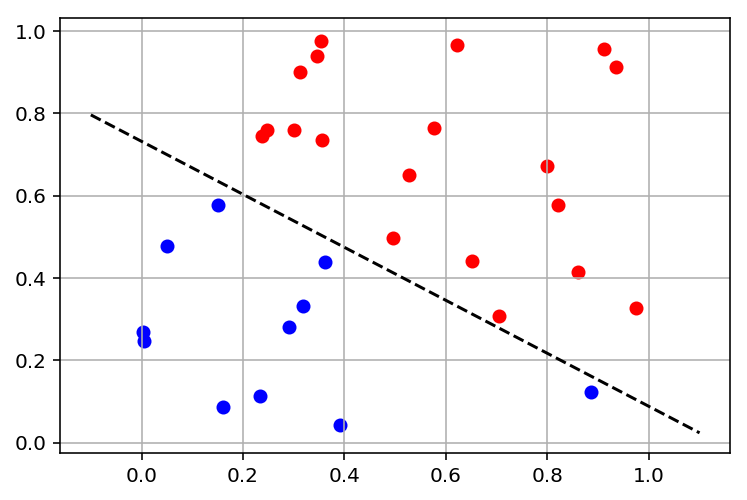

In [16]:
plot_scatter(np.append(b_sgd, W_sgd), xy, labels)